In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('results/logging/realsr_limited_10-gen/log-realsr_limited_10-gen.csv')
df

,epoch,train_loss,valid_loss,psnr,ssim,LPIPS,pixel,feat_0,feat_1,feat_2,time
0,0,69.982056,66.588341,11.552646,0.227902,0.509939,0.916904,1.353081,1.733782,0.690820,00:14
1,1,67.700699,66.146347,11.618429,0.208460,0.541578,0.915416,1.391206,1.667946,0.669504,00:07
2,2,66.742432,60.607830,12.699129,0.221827,0.521751,0.824489,1.371619,1.652048,0.693634,00:07
3,3,69.256607,59.411491,12.382976,0.213753,0.480029,0.845591,1.307976,1.616015,0.686299,00:07
4,4,68.493393,57.470860,12.648698,0.238583,0.492367,0.839398,1.294298,1.638662,0.676745,00:08
...,...,...,...,...,...,...,...,...,...,...,...
60003,59993,15.427139,26.579803,29.799402,0.874518,0.075589,0.099332,0.767107,1.052795,0.439340,00:19
60004,59994,15.422163,26.608919,28.868120,0.852619,0.085972,0.109243,0.790571,1.032719,0.419757,00:20
60005,59995,15.414975,26.068295,29.883757,0.887346,0.067389,0.094542,0.772701,1.035106,0.410561,00:20
60006,59996,15.416068,26.387590,29.626726,0.885120,0.065861,0.096573,0.768672,1.042871,0.423606,00:21


In [ ]:
import datetime

def make_delta(entry):
    m, s = entry.split(':')
    return datetime.timedelta(hours=0, minutes=int(m), seconds=int(s))

df['time'].apply(make_delta).sum()

Timedelta('9 days 00:11:49')

In [ ]:
np.greater([1,2,3],2)

array([False, False,  True])

In [ ]:
df_tmp = pd.DataFrame()
df_tmp['col'] = df['psnr'].rolling(1000).mean()
df_tmp

,col
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
60003,29.772607
60004,29.772730
60005,29.772147
60006,29.771681


In [ ]:
def find_first_idx(threshold = 29.2, column='psnr', comp_fn=np.greater, rolling = 1):
    return df[comp_fn(df[column], threshold)].index[0]

find_first_idx()

701

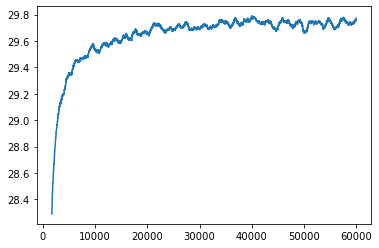

In [ ]:
plt.yscale('linear')
plt.plot(df['psnr'][701:].rolling(1000).mean())

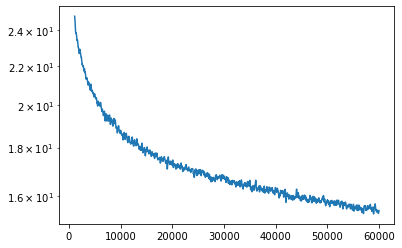

In [ ]:
plt.yscale('log')
plt.plot(df['train_loss'][1000:].rolling(100).mean())

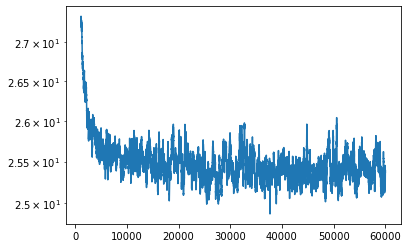

In [ ]:
plt.yscale('log')
plt.plot(df['valid_loss'][1000:].rolling(100).mean())